This example shows how to use the function create_animation (found in modules/plotter.py) to create a mp4 file animation of a time-lapse for 3D data. 

**To do: add customizable extent to create_animation function.**

In [1]:
import xarray as xr
import numpy as np
from IPython.display import Video
import sys
sys.path.append('../modules')
from plotter import create_animation

ModuleNotFoundError: No module named 'xarray'

In [2]:
# Set filepath
datdir = '../sample-data/'
filename = 'erai.mon.t2m.2000-2005.nc'
filepath = datdir + filename

# Open dataset using xarray
ds = xr.open_dataset(filepath)
ds

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 480, time: 72)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.75 358.5 359.25
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2000-01-01T12:00:00 ... 2005-12-01T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float64 ...
Attributes:
    Conventions:               CF-1.6
    history:                   Thu May  2 00:07:54 2019: ncpdq -U era.t2m.mon...
    NCO:                       4.6.7
    nco_openmp_thread_number:  1

../modules/plotter.py:356: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1, projection=mapcrs)


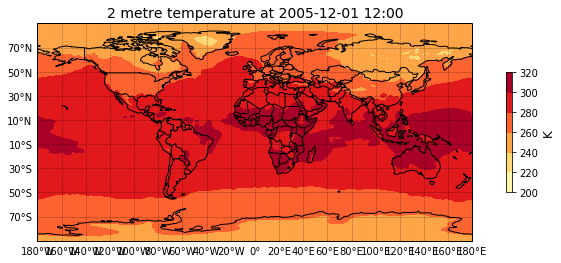

In [3]:
# choose variable from dataset
var = 't2m'
# set lats and lons
lats = ds.latitude
lons = ds.longitude
# set levels for contour plot
clevs = np.arange(200, 340, 20)
# set cmap for contour plot
cmap = 'YlOrRd'
# run animation function (Note: this may take a few minutes)
new_animation = create_animation(ds, lats, lons, var, clevs, cmap)
# show mp4 file in notebook
Video(new_animation)